In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Overview
- Load and combine training and testing datasets.
- Display basic statistics and check for missing or duplicate values.

In [2]:
df_train = pd.read_csv(r'data\customer_churn_dataset-training-master.csv')
df_test = pd.read_csv(r'data\customer_churn_dataset-testing-master.csv')
df_all = pd.concat([df_train, df_test])
df_all.head(10)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [3]:
df_all.tail(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64364,64365.0,48.0,Female,36.0,22.0,4.0,22.0,Premium,Annual,342.0,9.0,1.0
64365,64366.0,26.0,Female,54.0,24.0,2.0,21.0,Basic,Annual,165.0,23.0,1.0
64366,64367.0,64.0,Male,30.0,27.0,9.0,28.0,Premium,Annual,884.0,21.0,1.0
64367,64368.0,51.0,Male,47.0,17.0,10.0,26.0,Basic,Annual,544.0,24.0,1.0
64368,64369.0,45.0,Male,3.0,1.0,5.0,11.0,Standard,Annual,218.0,15.0,1.0
64369,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
64370,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
64371,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
64372,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0
64373,64374.0,52.0,Female,45.0,15.0,9.0,25.0,Standard,Monthly,696.0,22.0,1.0


In [4]:
df_all.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


# Data Cleaning
- Remove missing and duplicate entries.
- Ensure data consistency for analysis.

In [6]:
df_all.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [7]:
df_all.isnull().sum()   

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [8]:
df_all.duplicated().sum()

np.int64(0)

In [9]:
df_all.dropna(inplace=True)
df_all.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [10]:
df_all.duplicated().sum()

np.int64(0)

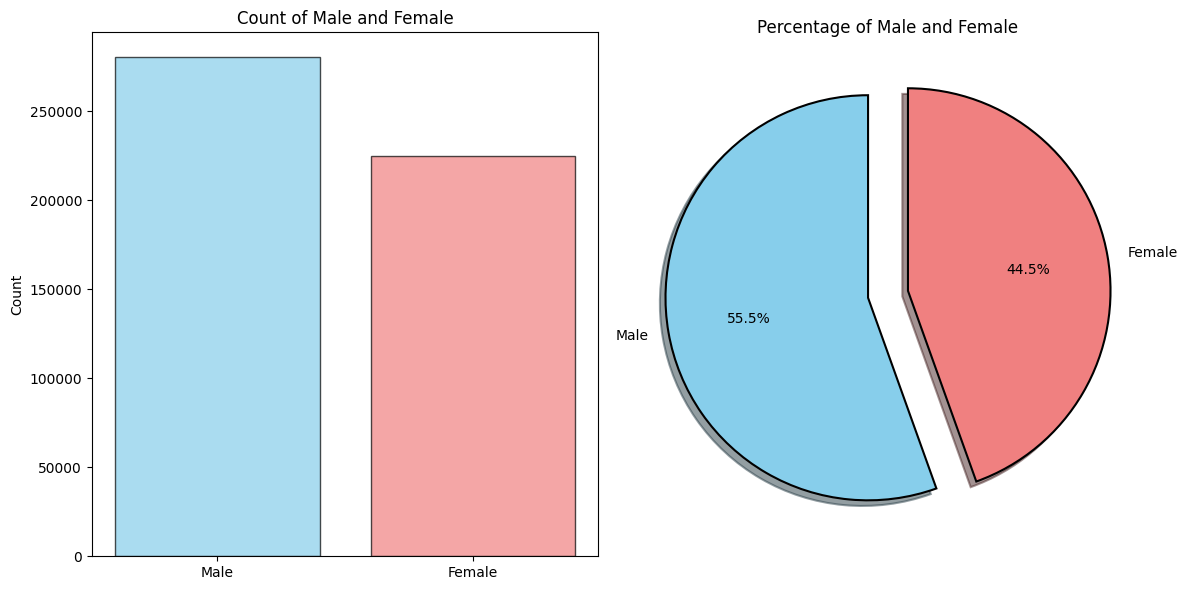

In [11]:
gender = df_all["Gender"].value_counts()
gender_percentage = gender/len(df_all) * 100

fig , axes = plt.subplots(1 ,2 ,figsize=(12,6))

axes[0].bar(gender.index, gender ,color=["skyblue","lightcoral"] ,edgecolor="black" , alpha=0.7)
axes[0].set_title("Count of Male and Female")
axes[0].set_ylabel("Count")

axes[1].pie(gender_percentage ,labels=gender.index ,colors=["skyblue","lightcoral"] ,autopct="%1.1f%%" ,startangle=90 ,explode=(0.1,0.1) ,shadow=True ,wedgeprops={"linewidth":1.5,"edgecolor":"black"})
axes[1].set_title("Percentage of Male and Female")

plt.tight_layout()
plt.show()


# Data Visualization
- Analyze gender and churn distributions.
- Use bar charts and pie charts for better insights.

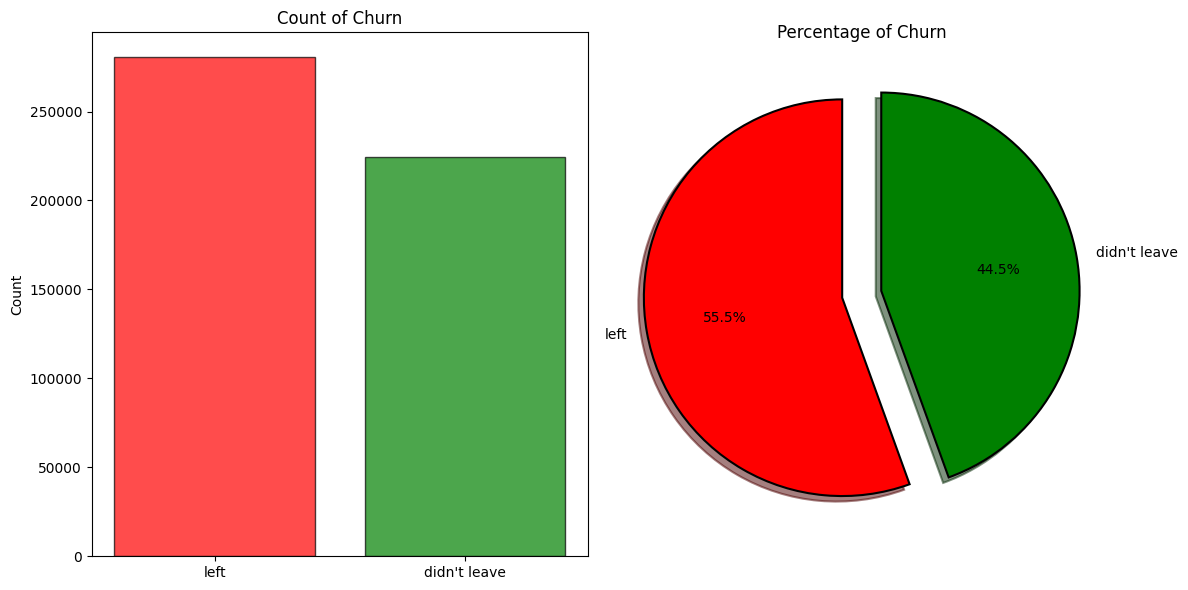

In [12]:
churn = df_all["Churn"].value_counts()
churn_percentage = churn/len(df_all) * 100

fig , axes = plt.subplots(1 ,2 ,figsize=(12,6))

axes[0].bar(['left', "didn't leave"], churn ,color=["red","green"] ,edgecolor="black" , alpha=0.7)
axes[0].set_title("Count of Churn")
axes[0].set_ylabel("Count")

axes[1].pie(churn_percentage ,labels=['left', "didn't leave"] ,colors=["red","green"] ,autopct="%1.1f%%" ,startangle=90 ,explode=(0.1,0.1) ,shadow=True ,wedgeprops={"linewidth":1.5,"edgecolor":"black"})
axes[1].set_title("Percentage of Churn")

plt.tight_layout()
plt.show()


In [13]:
import seaborn as sns

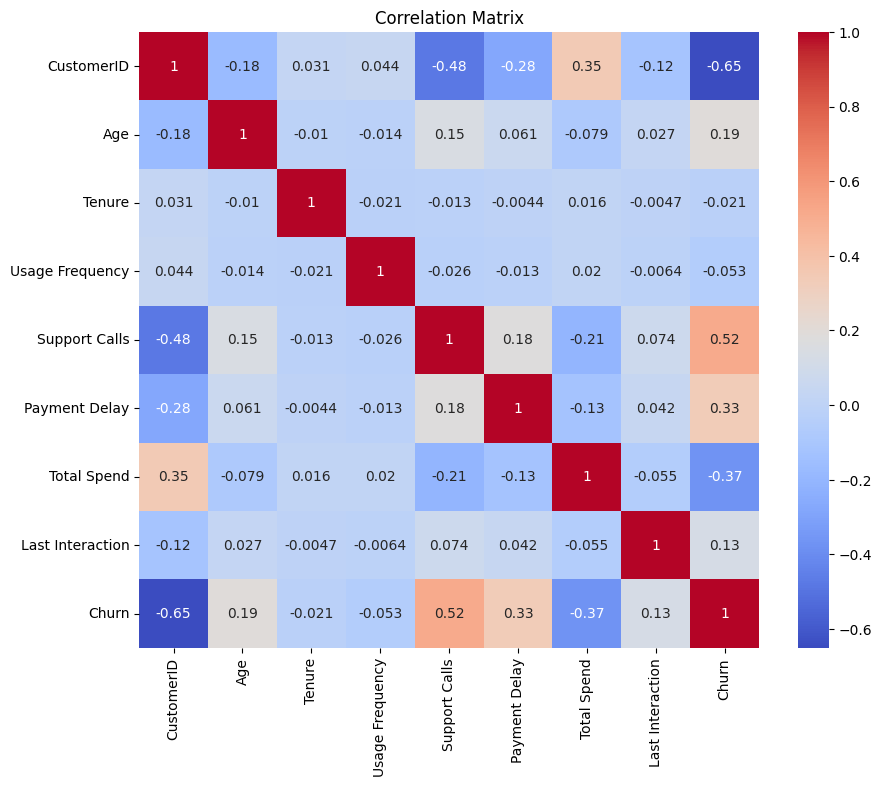

In [14]:
plt.figure(figsize=(10, 8))
numeric_df = df_all.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Correlation Analysis
- Explore relationships between numerical features.
- Use a heatmap to visualize correlations.

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
df_all["Gender"] = le.fit_transform(df_all["Gender"])
df_all["Subscription Type"] = le.fit_transform(df_all["Subscription Type"])
df_all["Contract Length"] = le.fit_transform(df_all["Contract Length"])
df_all.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0
5,8.0,51.0,1,33.0,25.0,9.0,26.0,1,0,129.0,8.0,1.0
6,9.0,58.0,0,49.0,12.0,3.0,16.0,2,2,821.0,24.0,1.0
7,10.0,55.0,0,37.0,8.0,4.0,15.0,1,0,445.0,30.0,1.0
8,11.0,39.0,1,12.0,5.0,7.0,4.0,2,2,969.0,13.0,1.0
9,12.0,64.0,0,3.0,25.0,2.0,11.0,2,2,415.0,29.0,1.0


In [17]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [18]:
df_all["Total Spend"] = std.fit_transform(df_all[["Total Spend"]])
df_all.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,1.271517,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,-0.257105,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,-1.773498,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,-0.913393,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,-0.012526,20.0,1.0
5,8.0,51.0,1,33.0,25.0,9.0,26.0,1,0,-2.001772,8.0,1.0
6,9.0,58.0,0,49.0,12.0,3.0,16.0,2,2,0.819045,24.0,1.0
7,10.0,55.0,0,37.0,8.0,4.0,15.0,1,0,-0.713653,30.0,1.0
8,11.0,39.0,1,12.0,5.0,7.0,4.0,2,2,1.422341,13.0,1.0
9,12.0,64.0,0,3.0,25.0,2.0,11.0,2,2,-0.835943,29.0,1.0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = df_all.drop(columns=["Churn"])
y = df_all["Churn"]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Handling Class Imbalance and Model Comparison

We'll address the class imbalance using techniques like:
1. SMOTE (Synthetic Minority Over-sampling Technique)
2. Class weights
3. Different sampling methods

Then we'll compare different classification algorithms and evaluate them using business-relevant metrics:
- Precision: How many predicted churners actually churned
- Recall: How many actual churners did we catch
- F1-score: Balanced measure of precision and recall
- ROC-AUC: Overall model discrimination ability

In [22]:
# Import necessary libraries for handling imbalanced data
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Check class distribution before and after SMOTE
print("Original class distribution:", Counter(y_train))
print("Balanced class distribution:", Counter(y_train_balanced))

Original class distribution: Counter({1.0: 224431, 0.0: 179733})
Balanced class distribution: Counter({0.0: 224431, 1.0: 224431})


In [23]:
# Import different classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=len(y_train_balanced[y_train_balanced==0])/len(y_train_balanced[y_train_balanced==1]), random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42)
}

# Dictionary to store results
results = {}

# Model Training and Evaluation
- Train multiple classifiers to predict churn.
- Evaluate models using precision, recall, F1-score, and ROC-AUC.

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


In [25]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'fpr': fpr,
        'tpr': tpr
    }

# Evaluate each model
model_results = {}
for name, model in models.items():
    model_results[name] = evaluate_model(
        model, 
        X_train_balanced, 
        y_train_balanced, 
        x_test, 
        y_test,
        name
    )

c:\Users\gidge\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results:
Accuracy: 0.8444
ROC AUC: 0.8849

Confusion Matrix:
[[37541  7440]
 [ 8278 47783]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83     44981
         1.0       0.87      0.85      0.86     56061

    accuracy                           0.84    101042
   macro avg       0.84      0.84      0.84    101042
weighted avg       0.84      0.84      0.84    101042


Random Forest Results:
Accuracy: 0.9358
ROC AUC: 0.9916

Confusion Matrix:
[[42301  2680]
 [ 3811 52250]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     44981
         1.0       0.95      0.93      0.94     56061

    accuracy                           0.94    101042
   macro avg       0.93      0.94      0.94    101042
weighted avg       0.94      0.94      0.94    101042


Random Forest Results:
Accuracy: 0.9358
ROC AUC: 0.9916

Confusion Matrix:
[[

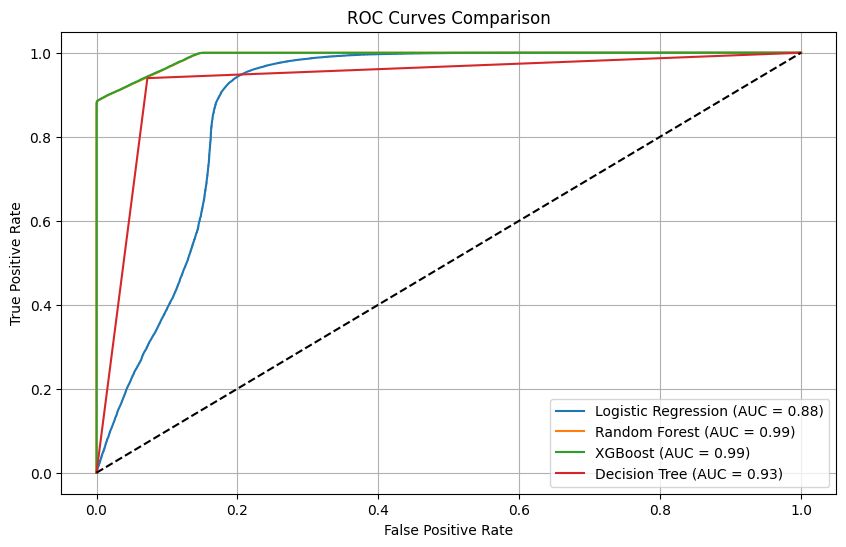

,Model,Accuracy,ROC AUC
2,XGBoost,0.936500,0.991700
1,Random Forest,0.935800,0.991600
3,Decision Tree,0.934300,0.933600
0,Logistic Regression,0.844400,0.884900


In [26]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, results in model_results.items():
    plt.plot(results['fpr'], results['tpr'], 
             label=f'{name} (AUC = {results["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [results['accuracy'] for results in model_results.values()],
    'ROC AUC': [results['roc_auc'] for results in model_results.values()]
})

# Format and display results
comparison_df = comparison_df.sort_values('ROC AUC', ascending=False)
comparison_df = comparison_df.round(4)
comparison_df.style.background_gradient(cmap='Blues')

# Business Insights and Recommendations

1. **Model Performance Analysis**:
   - Compare precision (cost of false positives) vs recall (cost of missing churners)
   - ROC-AUC scores show overall model discrimination ability
   - F1-scores balance precision and recall

2. **Business Impact**:
   - High precision: Fewer resources wasted on non-churners
   - High recall: Catch more potential churners before they leave
   - Balance based on business costs and resources

3. **Recommendations**:
   - Choose model based on business priority (precision vs recall)
   - Consider cost-benefit analysis of interventions
   - Monitor model performance over time